In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

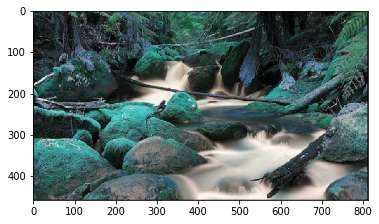

-1

In [23]:
#read image
img = cv2.imread('./images/input.jpg')


plt.imshow(img)
plt.show()

cv2.imshow('Input image', img)
cv2.waitKey()

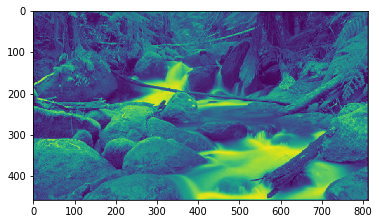

True

In [32]:
#Save image
gray = cv2.imread('./images/input.jpg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('save image', gray)
cv2.waitKey()

plt.imshow(gray)
plt.show()

cv2.imwrite('save/output.jpg', gray)

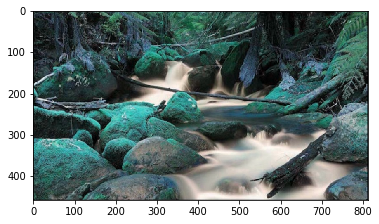

-1

In [6]:
#convert format image

cv2.imwrite('save/convert.jpg', img, [cv2.IMWRITE_PNG_COMPRESSION])

convert = cv2.imread('save/convert.jpg')


plt.imshow(convert)
plt.show()

cv2.imshow('convert image', convert)
cv2.waitKey()

(458, 812, 3)
(458, 812)
(458, 812, 3)
(458, 812) (458, 812) (458, 812)


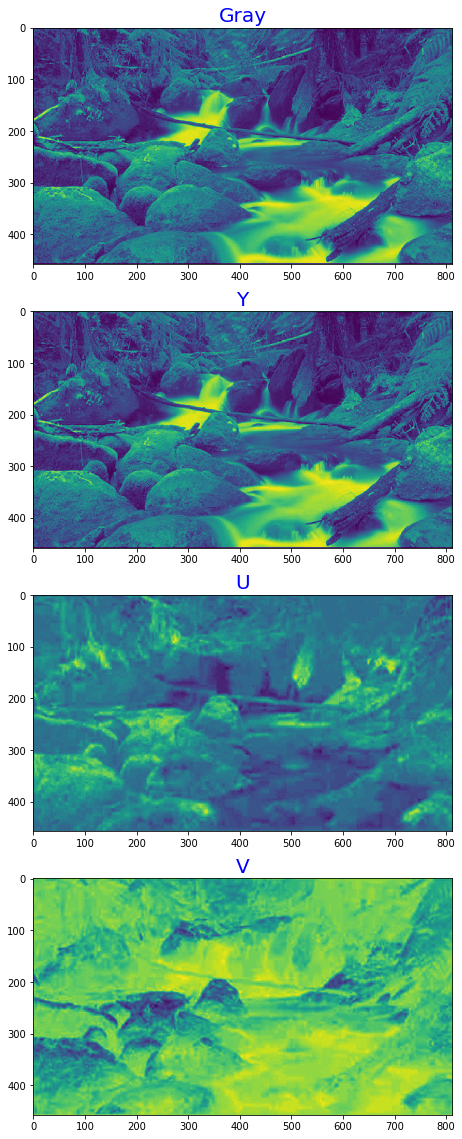

In [7]:
#color split
img_color = cv2.imread('images/input.jpg', cv2.IMREAD_COLOR)
print(img_color.shape)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)
print(img_gray.shape)

IMG_YUV = cv2.cvtColor(img_color, cv2.COLOR_RGB2YUV)
print(IMG_YUV.shape)
Y, U, V = cv2.split(IMG_YUV)
print(Y.shape, U.shape, V.shape)

cv2.imshow('gray', img_gray)
cv2.imshow('Y', Y)
cv2.imshow('U', U)
cv2.imshow('V', V)

cv2.waitKey()

fig, ax = plt.subplots(4,1, figsize=(40,20))
ax[0].imshow(img_gray)
ax[0].set_title('Gray', fontsize=20, color='b')

ax[1].imshow(Y)
ax[1].set_title('Y', fontsize=20, color='b')

ax[2].imshow(U)
ax[2].set_title('U', fontsize=20, color='b')

ax[3].imshow(V)
ax[3].set_title('V', fontsize=20, color='b')

plt.show()

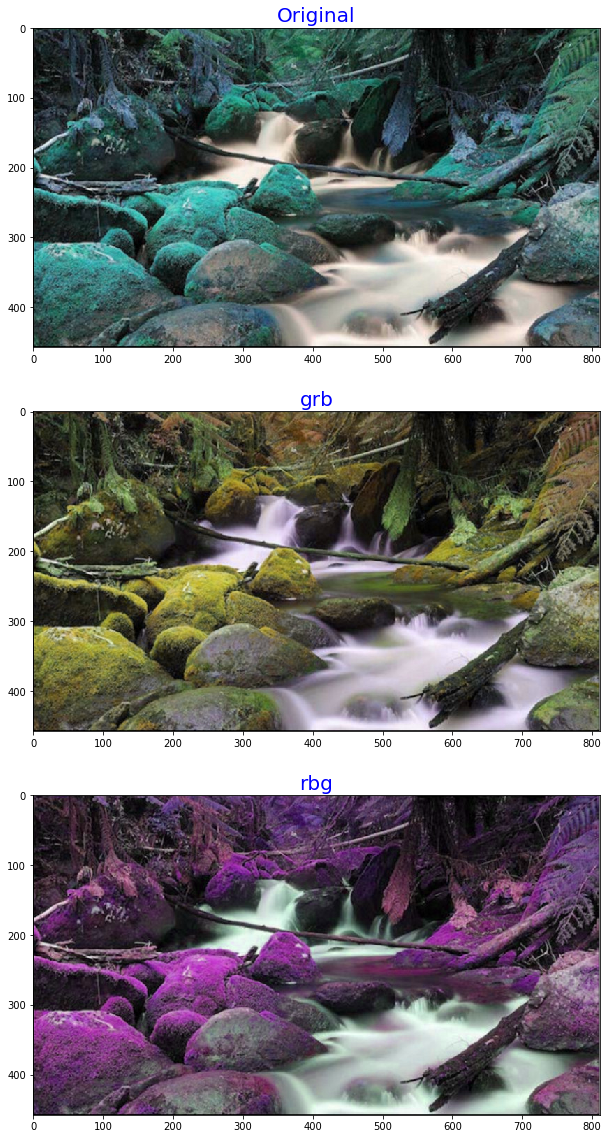

In [8]:
#color merge
b, g, r = cv2.split(img_color)
grb = cv2.merge((g, r, b))
rbg = cv2.merge((r, b, g))

cv2.imshow('Original', img_color)
cv2.imshow('grb', grb)
cv2.imshow('rbg', rbg)

cv2.waitKey()

fig, ax = plt.subplots(3,1, figsize=(40,20))
ax[0].imshow(img)
ax[0].set_title('Original', fontsize=20, color='b')

ax[1].imshow(grb)
ax[1].set_title('grb', fontsize=20, color='b')

ax[2].imshow(rbg)
ax[2].set_title('rbg', fontsize=20, color='b')

plt.show()

458 812


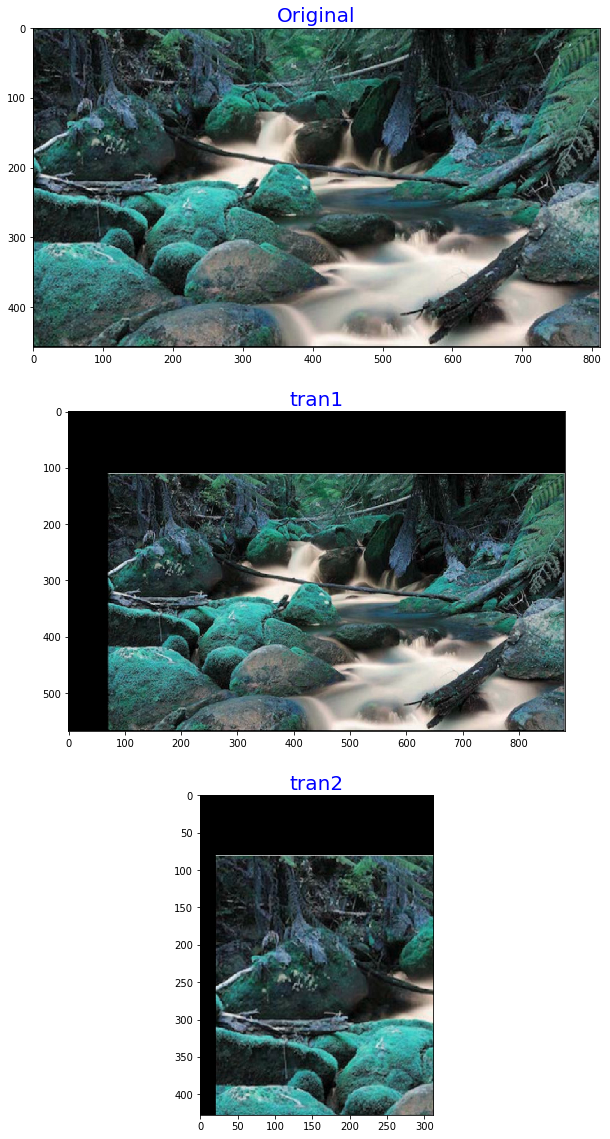

In [10]:
#image_translation
row, col = img.shape[:-1]
print(row, col)

tran_matrix1 = np.float32([[1,0,70], [0,1,110]])
img_tran1 = cv2.warpAffine(img, tran_matrix1, (col+70, row+110))
tran_matrix2 = np.float32([[1,0,-50], [0,1,-30]])
img_tran2 = cv2.warpAffine(img_tran1, tran_matrix2, (col-500, row-30))

cv2.imshow('tran1', img_tran1)
cv2.imshow('tran2', img_tran2)

cv2.waitKey()

fig, ax = plt.subplots(3,1, figsize=(40,20))
ax[0].imshow(img)
ax[0].set_title('Original', fontsize=20, color='b')

ax[1].imshow(img_tran1)
ax[1].set_title('tran1', fontsize=20, color='b')

ax[2].imshow(img_tran2)
ax[2].set_title('tran2', fontsize=20, color='b')

plt.show()

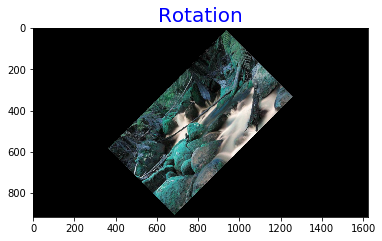

In [25]:
#image_rotation

tran_matrix3 = np.float32([ [1,0,int(0.5*col)], [0,1,int(0.5*row)] ])
rotation_matrix3 = cv2.getRotationMatrix2D((col, row), 45, 1)

img_tran3 = cv2.warpAffine(img, tran_matrix3, (2*col, 2*row))
img_rotation = cv2.warpAffine(img_tran3, rotation_matrix3, (col*2, row*2))

cv2.imshow('Rotation', img_rotation)
cv2.waitKey()

plt.imshow(img_rotation)
plt.title('Rotation', fontsize=20, color='b')
plt.show()

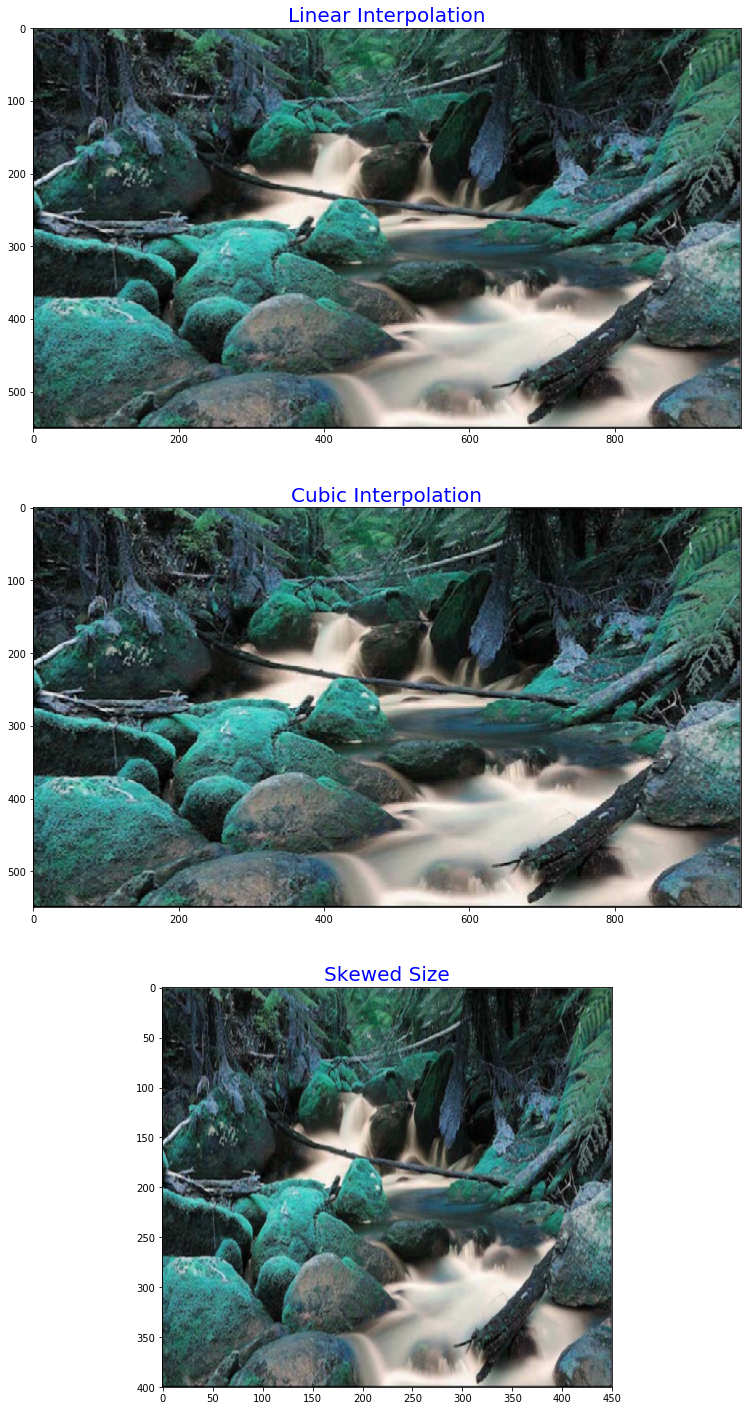

In [19]:
#image_scale

img_scaled1 = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_LINEAR)
cv2.imshow('Linear Interpolation', img_scaled1)

img_scaled2 = cv2.resize(img,None,fx=1.2, fy=1.2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Cubic Interpolation', img_scaled2)

img_scaled3 = cv2.resize(img,(450, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Skewed Size', img_scaled3)

cv2.waitKey()

fig, ax = plt.subplots(3,1, figsize=(50,25))
ax[0].imshow(img_scaled1)
ax[0].set_title('Linear Interpolation', fontsize=20, color='b')

ax[1].imshow(img_scaled2)
ax[1].set_title('Cubic Interpolation', fontsize=20, color='b')

ax[2].imshow(img_scaled3)
ax[2].set_title('Skewed Size', fontsize=20, color='b')

plt.show()

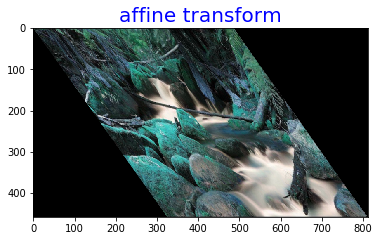

In [29]:
#trans_affine

src = np.float32([[0,0], [col-1,0], [0,row-1]])
dst = np.float32([[0,0], [int(0.6*(col-1)),0], [int(0.4*(col-1)),row-1]])

affine_matrix = cv2.getAffineTransform(src, dst)
img_output = cv2.warpAffine(img, affine_matrix, (col,row))

cv2.imshow('affine transform', img_output)
cv2.waitKey()

plt.imshow(img_output)
plt.title('affine transform', fontsize=20, color='b')
plt.show()

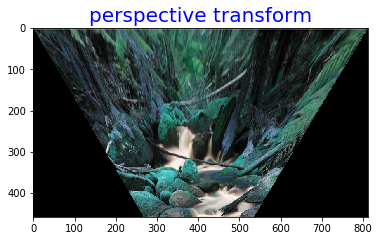

In [28]:
#trans_perspective

src = np.float32([[0,0], [col-1,0], [0,row-1], [col-1, row-1]])
dst = np.float32([[0,0], [col-1,0], [int(0.33*col),row-1], [int(0.66*col),row-1]])

affine_matrix = cv2.getPerspectiveTransform(src, dst)
img_output = cv2.warpPerspective(img, affine_matrix, (col,row))

cv2.imshow('affine transform', img_output)
cv2.waitKey()

plt.imshow(img_output)
plt.title('perspective transform', fontsize=20, color='b')
plt.show()

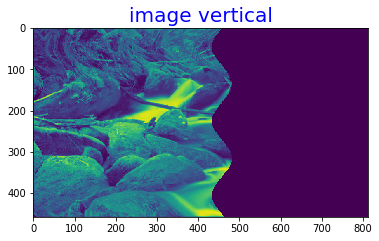

In [43]:
#vertical wave
img_vertical = np.zeros(gray.shape, dtype=img.dtype)

for i in range(row):
    for j in range(col):
        off_x = int(25*math.sin(2*math.pi*i/180))
        off_y = 0
        if j + off_x < row:
            img_vertical[i, j] = gray[i, (j+off_x)%col]
        else:
            img_vertical[i, j] = 0
            
cv2.imshow('image vertical', img_vertical)
cv2.waitKey()

plt.imshow(img_vertical)
plt.title('image vertical', fontsize=20, color='b')
plt.show()           

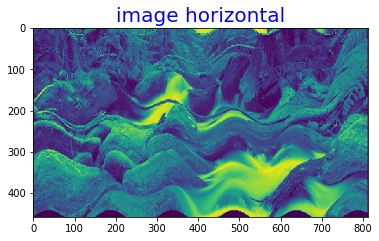

In [47]:
#horizontal wave
img_horizontal = np.zeros(gray.shape, dtype=img.dtype)

for i in range(row):
    for j in range(col):
        off_y = int(16*math.sin(2*math.pi*j/150))
        off_x = 0
        if i + off_y < row:
            img_horizontal[i, j] = gray[(i+off_y)%row, j]
        else:
            img_horizontal[i, j] = 0
            
cv2.imshow('image horizontal', img_horizontal)
cv2.waitKey()

plt.imshow(img_horizontal)
plt.title('image horizontal', fontsize=20, color='b')
plt.show()  

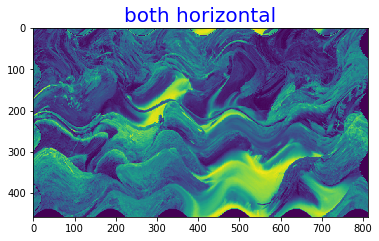

In [49]:
#both wave
img_both = np.zeros(gray.shape, dtype=img.dtype)

for i in range(row):
    for j in range(col):
        off_x = int(20*math.sin(2*math.pi*i/150))
        off_y = int(20*math.sin(2*math.pi*j/150))
        if i + off_y < row and j + off_x < col:
            img_both[i, j] = gray[(i+off_y)%row, (j+off_x)%col]
        else:
            img_both[i, j] = 0
            
cv2.imshow('both horizontal', img_both)
cv2.waitKey()

plt.imshow(img_both)
plt.title('both horizontal', fontsize=20, color='b')
plt.show()  

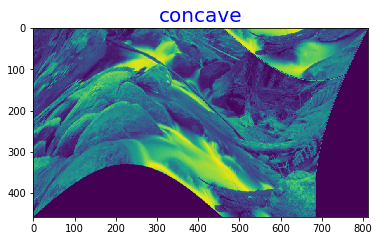

In [50]:
#concave wave
img_concave = np.zeros(gray.shape, dtype=img.dtype)

for i in range(row):
    for j in range(col):
        off_x = int(128*math.sin(2*math.pi*i/(2*col)))
        off_y = int(128*math.sin(2*math.pi*j/(2*row)))
        if j + off_x < col and i + off_y < row:
            img_concave[i, j] = gray[(i+off_y)%row, (j+off_x)%col]
        else:
            img_concave[i, j] = 0
            
cv2.imshow('concave', img_concave)
cv2.waitKey()

plt.imshow(img_concave)
plt.title('concave', fontsize=20, color='b')
plt.show()  